In [45]:
!conda install -c conda-forge xgboost --yes

^C

CondaError: KeyboardInterrupt



In [46]:
!conda install -c conda-forge category_encoders --yes

^C

CondaError: KeyboardInterrupt



In [ ]:
!conda install -c conda-forge eli5 --yes

In [28]:
!conda update scikit-learn --yes

Solving environment: done

# All requested packages already installed.



In [40]:
import pandas as pd
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [41]:
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [42]:
pd.set_option('display.max_columns', 1000)
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [93]:
#7 features with Nans
test_features.isna().sum().sort_values().tail(7)

subvillage             94
permit                663
funder                783
public_meeting        785
installer             788
scheme_management     939
scheme_name          6839
dtype: int64

In [44]:
test_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [89]:
#many features with high cardinality
test_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14358,13575,13570,14358,14358,14264,14358,14358,14358,13573,14358,13419,7519,13695,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358
unique,331,960,1075,10615,9,8253,21,124,1934,2,1,11,1772,2,17,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-16,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Borehole,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,137,2117,4162,822,2535,136,1258,611,79,12308,14358,8807,158,9442,6168,6168,6168,9780,12639,6098,6098,12237,12237,7997,7997,4211,4211,11127,6790,8260


In [46]:
test_features.shape, train_features.shape, train_labels.shape

((14358, 40), (59400, 40), (59400, 2))

In [47]:
#majority class baseline accuracy score ~ 54% 
#our model should perform better then our naive basemodel 
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [48]:
#since this is a classification problem, we will be using tree based models such as XGBoost and Random Forest
#overfitting could be an issue here, as 50% of the test set is held out in the private leaderboard 
#we will subdivide our training data set onto training and validation sets, we will use cross-validation 
#with independent test set, however we will be testing first on our new Kaggle subdivided validation set 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

In [50]:
 X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [51]:
def wrangle(X):
    X = X.copy()
    
    #drop some columns 
    X = X.drop(columns='id') #id is random 
    X = X.drop(columns='date_recorded') #we don't care about the recorded row date 
    X = X.drop(columns='longitude') #does not add relevant data
    X = X.drop(columns='latitude') #does not add relevant data 
    X = X.drop(columns='num_private') # data dictionary has no description for this feature
    X = X.drop(columns='public_meeting') # data dictionary provides only "true/false"
    X = X.drop(columns='extraction_type_group') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='extraction_type_class') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='payment_type') # duplicate feature
    X = X.drop(columns='quantity_group') # duplicate feature
    X = X.drop(columns='source_type') # not duplicate but bery similar thus contains high variance of source feature
    X = X.drop(columns='waterpoint_type_group') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='region') #quasi-duplicates
    X = X.drop(columns='quality_group') #quasi-duplicates
    X = X.drop(columns='source_class') #quasi-duplicates
    X = X.drop(columns='management_group') #quasi-duplicates
  
    #drop high cardinality categoricals
    X = X.drop(columns='funder')
    X = X.drop(columns='installer')
    X = X.drop(columns='wpt_name')
    X = X.drop(columns='subvillage')
    X = X.drop(columns='ward')
    X = X.drop(columns='scheme_name')
               
    
    #drop Nans from 'scheme_management' and 'permit' feature 
    X['scheme_management'].dropna()
    X['permit'].dropna()
    
    return X 


X_train = wrangle(X_train)
X_train_val = wrangle(X_train_val)  
X_test = wrangle(test_features)

In [52]:
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test

In [53]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 18), (14358, 18), (14358, 18))

In [54]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [55]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [64]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_distributions = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 3),
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=2, 
    n_jobs=-1, 
    cv=5, 
    verbose=10, 
    return_train_score=True, 
    random_state=42
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   14.6s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   14.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1152c14d0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11a9ea2d0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

search.best_score_

0.7042982105590337

In [66]:
best = search.best_estimator_ 
best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=61,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [68]:
y_train_val.value_counts()

functional                 7728
non functional             5590
functional needs repair    1040
Name: status_group, dtype: int64

In [69]:
y_pred = best.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional        10904
non functional     3454
Name: status_group, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.7091516924362724

In [71]:
#calculate predictions for submission
y_pred_submission = best.predict(X_test)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_submission)

In [74]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission.to_csv('lastday.csv', index=False)

In [77]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, X_train_val, y_train_val, scoring='accuracy', cv=5).mean()
accuracy

0.7701634052560957

In [81]:
#calculating predictions for cross_val set to see if it differs greatly from test set 
y_pred_cv = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_cv)
a['status_group'].value_counts()

functional                 8539
non functional             5195
functional needs repair     624
Name: status_group, dtype: int64

In [568]:
#calculate predictions for submission
y_pred_submission = model.predict(X_test)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_submission)
a['status_group'].value_counts()

functional                 8433
non functional             5294
functional needs repair     631
Name: status_group, dtype: int64

In [82]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission.to_csv('lastday.csv', index=False)

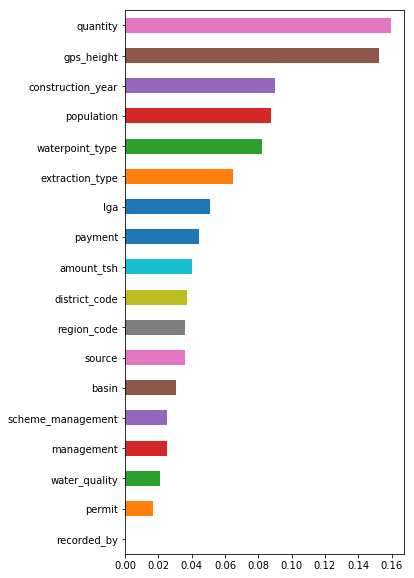

In [84]:
#exploring feature importances 
import matplotlib.pyplot as plt

figsize = (5, 10)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_,X_train.columns).sort_values()
importances.plot.barh()

In [87]:
#exploring permutation importances 
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=5, random_state=42)

permuter.fit(X_train_val, y_train_val)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring='accuracy')

In [88]:
feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1105 ± 0.0035,quantity
0.0594 ± 0.0029,waterpoint_type
0.0299 ± 0.0019,construction_year
0.0289 ± 0.0042,extraction_type
0.0139 ± 0.0039,payment
0.0119 ± 0.0023,population
0.0113 ± 0.0017,source
0.0110 ± 0.0024,amount_tsh
0.0089 ± 0.0024,gps_height
0.0048 ± 0.0020,lga


In [ ]:
#let's re-import our data and Wrangle our features differently 

In [229]:
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [230]:
#“wpt_name”, “subvillage”, “funder”, “installer”

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

In [232]:
 X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [233]:
def explore(X): 
    X = X.copy()
    
#     X = X.drop(columns=['wpt_name'])
#     X = X.drop(columns=['subvillage'])
#     X = X.drop(columns=['funder'])
#     X = X.drop(columns=['installer'])
    
    return X 

X_train = explore(X_train)
X_train_val = explore(X_train_val)  
X_test = explore(test_features)

In [234]:
X_train.shape, X_train_val.shape, X_test.shape

((45042, 40), (14358, 40), (14358, 40))

In [235]:
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test

In [236]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 40), (14358, 40), (14358, 40))

In [237]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [196]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [197]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, X_train_val, y_train_val, scoring='accuracy', cv=2).mean()
accuracy

0.7709987463435019

In [198]:
#calculate predictions for submission
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 8777
non functional             5059
functional needs repair     522
Name: status_group, dtype: int64

In [199]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8085387937038585

In [200]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=5, random_state=42)

permuter.fit(X_train_val, y_train_val)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring='accuracy')

In [201]:
feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0353 ± 0.0031,quantity
0.0347 ± 0.0030,quantity_group
0.0131 ± 0.0026,construction_year
0.0123 ± 0.0022,waterpoint_type
0.0103 ± 0.0014,longitude
0.0083 ± 0.0022,latitude
0.0075 ± 0.0023,amount_tsh
0.0074 ± 0.0020,population
0.0056 ± 0.0006,funder
0.0048 ± 0.0018,extraction_type_class


In [238]:
mask = permuter.feature_importances_ > 0 
features = X_train.columns[mask]
X_train = X_train[features]
X_train_val = X_train_val[features]

In [240]:
X_train.shape, X_train_val.shape

((45042, 33), (14358, 33))

In [244]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [245]:
#calculate predictions for submission
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 8545
non functional             5122
functional needs repair     691
Name: status_group, dtype: int64

In [246]:
#interesting how accuracy score decreases when feature with 0 permutation importance are removed 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8065886613734503

In [254]:
#let's try XGBoost once again... 

model = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [255]:
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 10151
non functional              4037
functional needs repair      170
Name: status_group, dtype: int64

In [256]:
accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.7467613873798579

In [257]:
#Construction year and GPS height 
test_features.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [268]:
#the mode is 0, we will try and replace with the median later on 

test_features['construction_year'].value_counts().sort_values().tail()

2000     473
2008     617
2009     646
2010     649
0       5024
Name: construction_year, dtype: int64

In [271]:
#llikewise for population
test_features['population'].value_counts().sort_values().tail()

250     398
200     423
150     430
1      1701
0      5205
Name: population, dtype: int64

In [278]:
#too many 'zeros', maybe best to drop 
test_features['num_private'].value_counts().sort_values().tail()

15       12
8        12
5        14
1        21
0     14169
Name: num_private, dtype: int64

In [281]:
#this is strange as well, 436 values at 0
test_features['latitude'].value_counts().sort_values().tail()

-8.645608e+00      1
-2.474560e+00      2
-7.170666e+00      2
-7.105919e+00      2
-2.000000e-08    436
Name: latitude, dtype: int64

In [282]:
#this is strange as well, 436 values at 0, 'Null Island' is not in Tanzania...
#Null Island is where the coordinates 0,0 are located 
test_features['longitude'].value_counts().sort_values().tail()

35.736642      1
37.302281      2
37.260069      2
32.920579      2
0.000000     436
Name: longitude, dtype: int64